# IV Kodutöö


## I osa - NBA (**15 punkti**)

Jaanus "Sops" Kolmene käib jõusaalis kolm korda nädalas. Järgmisel kuul sisustab ta ka reede õhtupooliku raskusi tõstes, sest tema rinnalihas on statistiku jaoks liiga nõrk. Nimelt otsib korvpalliklubi Brooklyn Nets oma ridadesse statistikut, kes analüüsiks korvpalliandmeid ja aitaks seeläbi optimiseerida meeskonna mängustrateegiat. Kandidaadi nõuete seas on ka 50 kg rinnalt surumine.

Kuna rinnalihase nõue on ehk peagi täidetud, tahab Jaanus enne intervjuule minekut saada praktilist kogemust NBA andmete analüüsimisel. Ta teab, et NBA mängude kohta kogutakse SportVU tehnoloogia abil detailset statistikat.

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum4/nba/player-tracking-summary.gif "Joonis nba.com lehelt")

Ta tahab koostada iga mängija ja meeskonna kohta profiili: kust visatakse ning kust tabatakse. Just nagu tegi [NY Times'i graafikaosakond:](http://www.nytimes.com/interactive/2012/06/11/sports/basketball/nba-shot-analysis.html)

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum4/nba/nytimes.png "Näide")

Selles praktikumis uurime, kuidas teha sarnast joonist R-i vahenditega.

### Tutvumine andmestikuga

Kasutame NBA 2020/21 hooaja andmeid.  
Lae alla vajalikud [NBA 2020/21 hooaja andmed](https://github.com/andmeteadus/2022/raw/master/data/NBA_20_21.zip) aine kodulehelt, paki fail lahti ja loe andmed järgmise koodiga sisse:

In [ ]:
# Sea paika töökataloog 
# Kui skripti fail asub samas kaustas andmetega, siis kasuta järgmist koodi.
# setwd(dirname(rstudioapi::getActiveDocumentContext()[[2]]))

# Loe andmed sisse
nba <- read.csv('NBA_20_21.csv')

Tunnused, mida järgnevalt vaja läheb, on:

* *PLAYER_NAME* - korvpalluri nimi
* *TEAM_NAME* - korvpalluri meeskonna nimi
* *SHOT_MADE_FLAG* - kas vise läks korvi
* *LOC_X* - viske x-koordinaat
* *LOC_Y* - viske y-koordinaat

Andmestikust ülevaate saamiseks võid enda jaoks visualiseerida huvipakkuva mängija viskekohti hajuvusdiagrammi abil, kus iga vise oleks punktike. Kasuta tunnuseid *LOC_X* ja *LOC_Y*.

Näpunäide: kasuta käsku `coord_fixed(ratio = 1)` (ka edaspidiselt).

### Ülesanne 1.1 - väljak diskreetseks (2 punkti)

Diskretiseeri mänguväljak (jaga mänguväljak tükkideks). 

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum4/nba/diskretiseeritud_manguvaljak.png "Näide")

Tükid moodusta nii, et ümarda x- ja y-koordinaat kümnelisteni. Iga kastikese kohta arvuta:

* visete arv
* tabavusprotsent

Tee seda iga algandmestikus oleva mängija puhul, võttes arvesse ka mängija meeskondlikku kuuluvust (mängija võib hooaja keskel meeskonda vahetada). Salvesta saadud andmestik muutujasse *nba_agr*.

Näpunäited: 

* uuri, mida teeb käsk `round(21:30, -1)`.
* kasuks tuleb paketi dplyr funktsionaalsus (`mutate`, `group_by`, `summarise`)

In [8]:
# Ülesanne 1.1
# sinu kood


### Ülesanne 1.2 - mänguväljaku põhja lisamine (1 punkti)

Visualiseeri enda jaoks ülesandes 1 saadud andmeid (valitud mängija korral). Iga diskretiseeritud kastikese kohta joonista ring. Ringi pindala olgu proportsionaalne visete arvuga.

Kasuta edasisel visualiseerimisel järgnevat koodi näidist mänguväljaku loomiseks.

Näpunäited: 

* määra `ylim(-50,300)` ja `xlim(-250,250)` (et ka varupingimeestel või hooaja keskel liitunutel näidatakse ikka tervet väljakut).

In [ ]:
library(grid) 
library(jpeg) 

# mänguväljaku loomine pildi abil
manguvaljak <- rasterGrob(readJPEG("nba_court.jpg"), width=unit(1,"npc"), height=unit(1,"npc"))
                    
valitud_mangija_agr = filter(nba_agr, PLAYER_NAME == 'LeBron James') # Vaheta nimi!

valjak <- ggplot(valitud_mangija_agr, aes(x = x_uus, y = y_uus)) + 
  annotation_custom(manguvaljak, -250, 250, -50, 420) + geom_point()

# Ülesanne 1.2
# sinu kood


### Ülesanne 1.3 - suuruse muutmine (1 punkti)

NY Timesi graafikaosakond on jaganud visete arvu kolme kategooriasse: *low*, *medium*, *high*. Vali välja piirid, mille põhjal jaotatakse visete arv kolme kategooriasse (*low*, *medium*, *high*). Iga kategooria jaoks vali sobiv pindala suurus (kontrolli, et tulemus oleks visuaalselt kena). Kirjuta funktsioon `kolm_suurust`, mis vastavalt valitud suuruste väärtustele ning kategooriate piiridele tagastab andmestiku, kus tunnus "uus_suurus" vastab kategooria suurusele.

Visualiseeri enda jaoks viskepositsioone sarnaselt eelmisele joonisele, kuid nüüd olgu ringidel vaid 3 erinevat suurust.


In [ ]:
# Ülesanne 1.3

kolm_suurust = function(andmed, suurus1, suurus2, suurus3, piir1, piir2){
  # Kui visete_arv <= piir1, siis uus_suurus = suurus1,
  # kui piir1 < visete_arv <= piir2, siis uus_suurus = suurus2,
  # kui visete_arv>piir2, siis uus_suurus = suurus3
  
  # sinu kood
}

### Ülesanne 1.4 - värvid (1 punkti)

Uuri, mida tähistavad [NY Times'i graafikul](http://www.nytimes.com/interactive/2012/06/11/sports/basketball/nba-shot-analysis.html) punane ja roheline värv.

Lisa nüüd ringidele värv vastavalt visketabavusele. Kasuta sarnast värvigammat, näiteks värvikoodid *#ABCDBC*, *#EFF471* ja *#D9060B*.

Näpunäide:

* uuri, mida teeb käsk `scale_color_gradient2()`, sh parameeter *midpoint*.

In [ ]:
# Ülesanne 1.4
# sinu kood


### Ülesanne 1.5 - kuusnurgad (3 punkti)

Kasuta nüüd ringide asemel kuusnurki. 

Meeldetuletus kuusnurkadest:

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum4/nba/hexagon.png "Näide")

`ggplot()` võimaldab parameetri `shape` abil määrata erinevaid geomeetrilisi kujutusviise (näit. ruut, kolmnurk), kuid valikute seas ei leidu kuusnurka. Oleme ette andnud funktsiooni `kuusnurk`, mis sisestades kuusnurga keskpunkti koordinaadid ja pindala, väljastab kuusnurga tippude koordinaadid. Paraku ise defineeritud geomeetriliste objektide kujutamiseks `geom_point()` ei sobi. 

Näpunäited:

* uuri, mida teeb funktsioon `geom_polygon()`
* uuri, mida teeb funktsioon `kuusnurk` ühe vaatluse korral (st fikseeritud koordinaatide x ja y ning pindala korral)
* moodusta eelnevalt valitud mängijale vastav uus andmestik, kus olemasoleva andmestiku iga rida on dubleeritud 6 korda, et kuusnurga iga tipu kohta oleks sama info
* kuusnurkade eristamiseks tuleks lisada grupeeriv tunnus, mida `ggplot` joonist tehes parameetri `group` puhul kasutada
* kuusnurki saab seest värvida parameetri `fill` abil ja kontuure parameetri `color` abil.
* uuri, mida teeb funktsioon `scale_fill_gradient2()`



In [ ]:
# Ülesanne 1.5

kuusnurk = function(x, y, pindala){
    r = sqrt(2*sqrt(3)/9*pindala)
    x_coord=x+c(0,sqrt(3)/2*r,sqrt(3)/2*r,0,-sqrt(3)/2*r,-sqrt(3)/2*r) 
    y_coord=y+c(r, r/2, -r/2, -r, -r/2, r/2)
    return(data.frame(x_kuusnurk=x_coord,y_kuusnurk=y_coord))
  }

# Sinu kood


### Ülesanne 1.6 - shiny rakendus (7 punkti)

Ehita Shiny rakendus, kus kasutaja saab valida meeskonna ja valitud meeskonnas oleva mängija. Seejärel peab rakendus kuvama valitud mängijale vastava viskeprofiili.

Juhend:

1. Tekita esmalt võimalus meeskonna valikuks
  - Kasuta ui osas funktsiooni `selectInput()`
  - parameetri *choices* valikuks olgu algandmetes olevate meeskondade nimed tähestiku järjekorras
  - testi enda jaoks, kas see valik töötab
2. Tekita juurde võimalus mängija valikuks. Kasutajale kuvatakse vaid neid mängijaid, kes kuuluvad (või on hooaja jooksul kuulunud) valitud meeskonda.
  - Kasuta ui osas funktsiooni `selectInput()`
  - parameetri *choices* väärtuseks olgu esialgu tühisõne, st "",

In [ ]:
selectInput("mangija", "Vali mängija", choices = "")

  - Vaata, et `server` funktsioonil oleks juures parameeter *session*

In [ ]:
server <- function(input, output, session) {

  - kasuta server funktsiooni sees funktsiooni `observe()` (selleks, et kui meeskonna valikut on muudetud, uuendataks ka mängijate nimekirja)
  - funktsiooni `observe()` sees kasuta omakorda funktsiooni `updateSelectizeInput` (uuri ka, mida see teeb):

In [ ]:
  observe({

    # Sinu kood
    ## Vali välja nende mängijate nimed, kes kuuluvad (või on kuulunud) 
    ## valitud meeskonda
    
    ## mangijad_meeskonnas = ...
    
    updateSelectizeInput(session, "mangija",
                         label = "Vali mängija",
                         choices = mangijad_meeskonnas,
                         selected = head(mangijad_meeskonnas, 1))
  })

  - `observe()` sisuks on jälgida, kas mõni temas sisalduv sisendi väärtus on muutunud (antud kontekstis meeskonna valik). Kui on, siis jooksutatakse läbi kogu observe() funktsioonis sisalduv kood.
  - Kontrolli, kas kood töötab nii nagu vaja.
3. Väljasta valitud meeskonna ja mängija viskeprofiili joonis (vt ülesanne 5).
4. Eemalda jooniselt kõik üleliigne (telgede tekst, tick’d, joonise raam ja ruudustik (grid)). Kasuta selleks funktsiooni `theme()`.

Lõplik tulemus võiks välja nähe umbes selline:

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum4/nba/Shiny_kuva.PNG "Shiny")


### Boonusülesanne B1.1 - mängijate valik (2 punkt)

Muuda mängijate valikut selliselt, et mängijaid kuvatakse vastavalt sooritatud visete arvule (rohkem viskeid teinud mängijad eespool).

In [ ]:
# Ülesanne B1.1
# Vii lahendus sisse Ülesandes 1.6 aga seleta või kirjuta siia kood kuidas tegid


### Boonusülesanne B1.2 - geomeetria (1 punkt)

Kui võrrelda meie kuusnurki NY Times'i omadega, siis on näha, et NY Times'i omi on 90 kraadi pööratud. Muuda funktsiooni `kuusnurk()` selliselt, et selle väljundiks olev kuusnurk oleks 90 kraadi pööratud.

In [ ]:
# Ülesanne B1.2
# Vii lahendus sisse Ülesandes 1.6 aga esita siia UUE funktsiooni kuusnurk() kood





## II osa - lennuliikluse visualiseerimine (**10 punkti**)

Paul Butler oli 2010. aasta lõpus Facebookis praktikal. Ta visualiseeris sotsiaalvõrgustiku andmeid tõmmates jooni sõprade asukohtade vahel.

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum4/geo/facebook_map.png "Näide")

Joonis on atraktiivne ja annab hästi edasi FB visiooni. Seda sama joonist näidatakse igapäevaselt FB kontoris hiigelsuurelt ekraanilt ja kasutati näiteks FB aktsiaemissiooni prospektis, et meelde tuletada või selgitada ettevõtte missiooni. Paul tegi selle joonise [kasutades R-i.](http://paulbutler.org/archives/visualizing-facebook-friends/) Kuna FB meile andmeid ei andnud, vaatame selles kodutöös, kuidas lennuliiklus ühendab maailma.

### Tutvumine andmestikuga

Laadi alla andmestikud [airports.csv](https://raw.githubusercontent.com/andmeteadus/2021/master/data/airports.csv) ja [flights.csv](https://raw.githubusercontent.com/andmeteadus/2021/master/data/flights.csv) ning loe need töökeskkonda.

Andmestikus *airports.csv* on informatsioon lennujaamade kohta. Selles on järgnevad tunnused:

* *id* - lennujaama id
* *name* - lennujaama nimi
* *city* - millises linnas asub lennujaam
* *country* - millises riigis asub lennujaam
* *lat* - lennujaama asukoha laiuskraad
* *lon* - lennujaama asukoha pikkuskraad

Andmestik *flights.csv* sisaldab infot lendude kohta. Selles on järgnevad tunnused:

* *airline* - lennukompanii lühend
* *airline_id* - lennukompanii id
* *source_airport* - lähtekoha lennujaama lühend
* *source_airport_id* - lähtekoha lennujaama id
* *dest_airport* - sihtkoha lennujaama lühend
* *dest_airport_id* - sithkoha lennujaama id

### Suurringjoon

Paul Butler kasutas suurringjooni, et visualiseerida ühendusi sõprade vahel. Kahe punkti lühim vahemaa keral avaldub [suurringjoone](http://en.wikipedia.org/wiki/Great_circle) kaudu. Kui tuult ja muid sarnaseid tegureid mitte arvestada, lendavad lennukid pikki vahemaid suurringjoonte marsruutide kaudu.

Järgneval joonisel on see tähistatud punase joonega.

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum4/geo/great_circle.jpg "Näide")

### Näide1: suurringjoon R-is

Näide, kuidas joonistada suurringjoont R-is. Ühendame Delta maja Facebooki peakontoriga kasutades baasgraafika võimalusi.

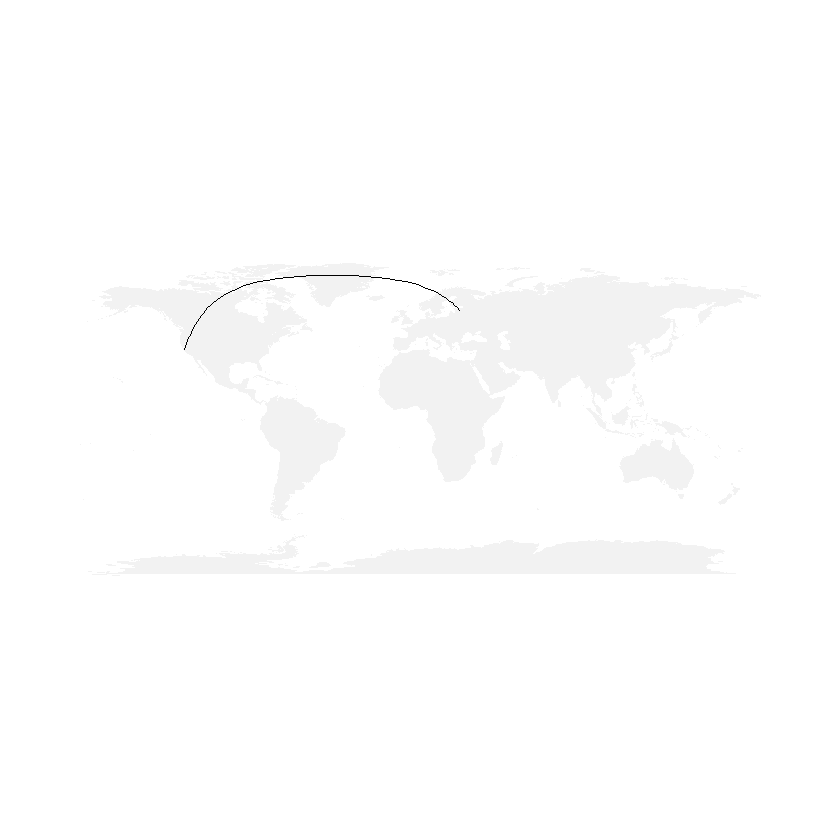

In [3]:
library(maps)
library(geosphere)

map("world", col="#f2f2f2", fill=TRUE, border=NA)

lat_delta = 58.385582 
lon_delta = 26.725512
lat_fb = 37.485245
lon_fb = -122.148807

gc_points = gcIntermediate(c(lon_delta, lat_delta), 
                           c(lon_fb, lat_fb), 
                           n=50, addStartEnd=TRUE)
lines(gc_points)

### Näide2: suurringjoon R-is

Näide, kuidas joonistada suurringjoont R-is. Ühendame Delta maja maailma suurima pitsa sünnikohaga kasutades `leaflet` paketti. Loe rohkem `leaflet`'i kohta [siit.](https://rstudio.github.io/leaflet/)


In [20]:
lat_delta = 58.385582 
lon_delta = 26.725512
lat_pitsa = 41.535158
lon_pitsa = 12.306798

library(leaflet)
library(geosphere)

m = leaflet() #koordinaatsüsteemis sisse lugemine

m = addTiles(m) #kaardikihtide lisamine

#suurringjoone punktid
gc_points = gcIntermediate(c(lon_delta, lat_delta), 
                           c(lon_pitsa, lat_pitsa), 
                           n=50, addStartEnd=TRUE)
gc = data.frame(gc_points)

m = m %>% #punktide lisamine kaardile
  addCircles(lng = lon_delta,lat = lat_delta,color = 'red',weight = 3) %>%
  addCircles(lng = lon_pitsa,lat = lat_pitsa,color = 'red',weight = 3)

m = m %>% #joonte lisamine kaardile
  addPolylines(lng = gc$lon, lat = gc$lat, weight = 3, color = 'red')

m = m %>% 
  setView(lng = 0, lat = 50, zoom = 3) %>% 
  addProviderTiles("Esri.WorldImagery") #geoloogiline

# Järgmised käsud on vajalikud pildi kuvamiseks Jupyteris ---
library(htmlwidgets)
library(IRdisplay)

# NB! Kui kasutad leaflet() paketti, siis oma lahenduses muuda html faili nime
saveWidget(m, 'demo.html', selfcontained = FALSE) 
display_html('<iframe src="demo.html" width="500px" height="300px"></iframe>')
# -----------------------------------------------------------

m  # R-is jooksutamiseks

HTML widgets cannot be represented in plain text (need html)

### Ülesanne 2.1 (4 punkti)

Visualiseeri suurringjoonte abil ühendusi, kuhu saab Tallinna lennujaamast otselennuga. Võid kasutada vabalt valitud meetodit eelnevalt toodud näidete seast. 

Näpunäited:

* Kuna otselennuga saab Tallinnast vaid Euroopasse, siis kanna joonisele vaid Euroopa kaart.
* Tallinna lennujaama kood on 415 (mille võid leida, kui uurid andmestikust `airports` Eesti lennujaamu).
* Sihtkohtade lennujaamad leiad andmestikust *flights.csv*.
* Lennujaamade koordinaadid leiad andmestikus *airports.csv*.

In [ ]:
# Ülesanne 2.1
# sinu kood


### Ülesanne 2.2 (6 punkti)

Visualiseeri ühendusi, kuhu saab Tallinna lennujaamast otselennu või ühe vahepeatusega. Võid kasutada esimeses ning kolmandas näites tutvustatud võimalusi.

Näpunäited: 

* Et värve muuta läbipaistvaks, lisa värvikoodile lõppu läbipaistvuse intensiivsus. Näiteks kasuta funktsiooni `lines` korral argumenti `col="#00000010"`, et muuta mustade (värvikood #000000) joonte läbipaistvus 10%-ni või funktsiooni `addPolylines` korral argumente `weight=0.7` ja `opacity=0.3`.  

* Visualiseeri ühendusi Tallinn - vahelennujaam - lõpp-punkt. Tingimata pole tarvis mitu korda joonistada Tallinn - vahelennujaam ühendusi, need võid joonistada ka ühe korra.

Sinu joonis võiks tulla umbes selline:

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum4/geo/otselend_voi_yks_vahepeatus.png "Näide1")

või selline:

![](https://raw.githubusercontent.com/andmeteadus/2021/master/_praktikum4/geo/otselend_voi_yks_vahepeatus2.png "Näide2")


In [ ]:
# Ülesanne 2.2
# sinu kood



### Boonusülesanne B2.1 (1 punkt) - Juhuslik ekslemine eralennukiga

Alusta Tallinna lennujaamast. Vali kõikvõimalikest lennujaamadest juhuslikult üks ja lenda sinna. Vali nüüd juhuslikult järgmine sihtpunkt ning lenda sinna. Jätka seda protsessi 100 korral ja visualiseeri läbitud teekonda.

In [ ]:
# Ülesanne B2.1
# sinu kood


### Boonusülesanne B2.2 (2 punkti) - Juhuslik ekslemine kasutades kommertsliine

Alusta Tallinna lennujaamast. Vali võimalikest sihtkohtadest üks ja lenda sinna. Vali selle lennujaama võimalikest sihtkohtadest juhuslikult järgmine ning lenda sinna. Jätka seda protsessi 100 korral ja visualiseeri läbitud teekonda.

In [ ]:
# Ülesanne B2.2
# sinu kood


## <font color='red'>See oli viimane ülesanne! Palun jooksuta kogu Jupyter Notebook uuesti, et veenduda oma koodi töötamises! (`Kernel -> Restart and Run All`)</font>


# Mida on vaja esitada?

* I osa ülesanne 1.6 kohta tuleb esitada iseseisvalt töötav Shiny rakenduse fail (nö. app.R või ui.R ja server.R). **NB! Nimeta fail umber kujule `<matrikli nr>_app.R` või `<matrikli nr>_ui.R`/`<matrikli nr>_server.R` (nt A12345_app.R).** ülejäänud ülesanded lahenda Jupyter failis.
* II osa ülesanded lahenda Jupyter failis. 
* Lisaks võiksid mainida, kui palju aega kulus I ja II osa peale. Mida arvad ülesannetest?

Lahendused esitada [Moodle keskkonna](https://moodle.ut.ee/course/view.php?id=8013#section-1) kaudu.


## Lahendamise aeg

Lisaks võiksid mainida, kui palju aega kulus osa I ja II. Mida arvad ülesannetest (kasulikkus, huvitavus)?

**<font color='red'>Kodutöö I osa lahendamiseks kulus:</font>** X h

**<font color='red'>Kodutöö II osa lahendamiseks kulus:</font>** X h

Ülesanded olid ... 

**Tänan vastamast!**